In [42]:
import matplotlib.pyplot as plt
# Function to plot the losses
def plot_losses(losses):
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Training Steps')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.ylim(0, 10)
    plt.show()

# Function to plot in-task errors
def plot_in_task_errors(errors):
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    plt.plot([x[0] for x in errors['ece'][:len(errors['ece']) - 1]], label='ECE Mean')
    plt.fill_between(range(len(errors['ece']) - 1), 
                     [x[0] - x[1] for x in errors['ece'][:len(errors['ece']) - 1]], 
                     [x[0] + x[1] for x in errors['ece'][:len(errors['ece']) - 1]], 
                     alpha=0.2)
    plt.xlabel('Evaluation Points')
    plt.ylabel('CEE')
    plt.title('CEE')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot([x[0] for x in errors['rmse']], label='RMSE Mean')
    plt.fill_between(range(len(errors['rmse'])), 
                     [x[0] - x[1] for x in errors['rmse']], 
                     [x[0] + x[1] for x in errors['rmse']], 
                     alpha=0.2)
    plt.xlabel('Evaluation Points')
    plt.ylabel('RMSE')
    plt.title('RMSE')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    # print minimum rmse and minimum ece error
    print("Minimum RMSE: ", min([x[0] for x in errors['rmse']]))
    print("Minimum ECE: ", min([x[0] for x in errors['ece']]))

# Function to plot out-task errors (if applicable)
def plot_out_task_errors(errors):
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    plt.plot([x[0] for x in errors['ece']], label='ECE Mean')
    plt.fill_between(range(len(errors['ece'])), 
                     [x[0] - x[1] for x in errors['ece']], 
                     [x[0] + x[1] for x in errors['ece']], 
                     alpha=0.2)
    plt.xlabel('Evaluation Points')
    plt.ylabel('ECE')
    plt.title('Out-task ECE')
    plt.ylim(2, 5)
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot([x[0] for x in errors['rmse']], label='RMSE Mean')
    plt.fill_between(range(len(errors['rmse'])), 
                     [x[0] - x[1] for x in errors['rmse']], 
                     [x[0] + x[1] for x in errors['rmse']], 
                     alpha=0.2)
    plt.xlabel('Evaluation Points')
    plt.ylabel('RMSE')
    plt.title('Out-task RMSE')
    plt.ylim(6, 8)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

1000
124


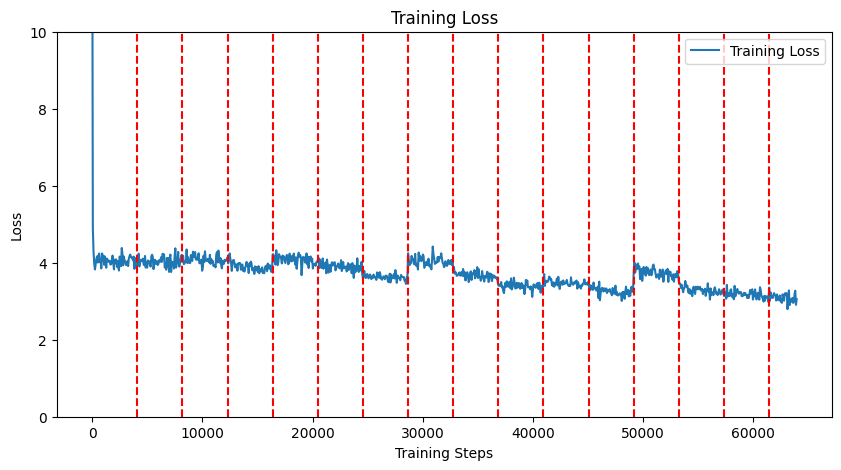

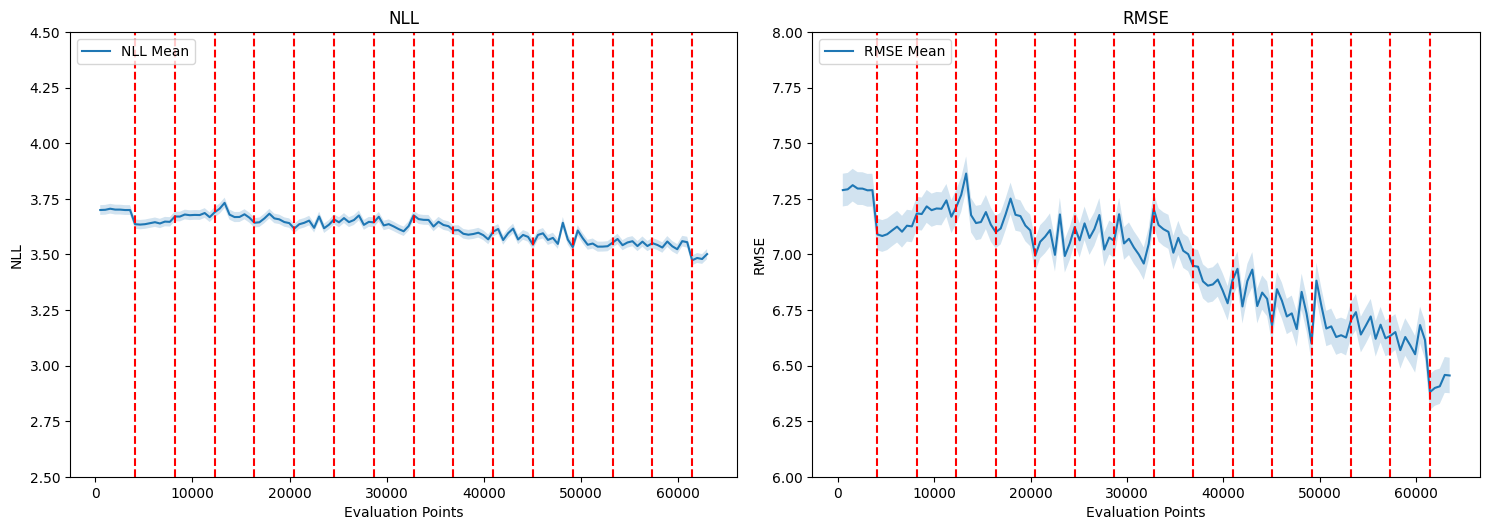

Minimum RMSE:  6.380545
Minimum ECE:  3.473282


In [82]:
import pickle
import os
import matplotlib.pyplot as plt

# Define the path where the data is saved
save_path = "./baseline_deneme10/"
model_name = "base_0_1_"

# Load the saved metrics
with open(os.path.join(save_path, model_name + '_training_metrics.pkl'), 'rb') as f:
    metrics = pickle.load(f)

# Extract the data
losses = metrics["training_loss"]
in_task_errors = metrics["training_intask_errors"]
out_task_errors = metrics["training_outtask_errors"]
print(len(losses))
print(len(in_task_errors['rmse']))

import matplotlib.pyplot as plt
import numpy as np

# Function to smooth data using a simple moving average
def smooth_data(data, window_size=3):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Function to plot the losses
def plot_losses(losses, rate = 64, interval = 4096, smooth=False, window_size=3, tick_resolution=50):
    plt.figure(figsize=(10, 5))
    if smooth:
        losses = smooth_data(losses, window_size)
    x = np.arange(0, len(losses) * rate, rate)
    plt.plot(x, losses, label='Training Loss')
    plt.xlabel('Training Steps')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.ylim(0, 10)
    
    # Increase tick resolution
    # plt.xticks(np.arange(0, len(losses), step=tick_resolution))
    # plt.yticks(np.arange(0, 11, step=1))
    
    # Adding vertical dotted lines at constant intervals
    if interval > 0:
        for x in range(interval, len(losses) * rate, interval):
            plt.axvline(x=x, color='red', linestyle='--')
    plt.legend()
    plt.show()

# Function to plot in-task errors
def plot_in_task_errors(errors, rate = 512, interval = 4096, smooth=False, window_size=3, tick_resolution=5):
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    ece_mean = [x[0] for x in errors['ece'][:len(errors['ece']) - 1]]
    if smooth:
        ece_mean = smooth_data(ece_mean, window_size)
    x = np.arange(rate, len(ece_mean) * rate + 1, rate)
    plt.plot(x, ece_mean, label='NLL Mean')
    plt.fill_between(x, 
                     [x[0] - x[1] for x in errors['ece'][:len(errors['ece']) - 1]], 
                     [x[0] + x[1] for x in errors['ece'][:len(errors['ece']) - 1]], 
                     alpha=0.2)
    plt.xlabel('Evaluation Points')
    plt.ylabel('NLL')
    plt.ylim(2.5, 4.5)
    plt.title('NLL')
    
    
    # # Increase tick resolution
    # plt.xticks(np.arange(0, len(ece_mean), step=tick_resolution))
    # plt.yticks(np.arange(0, max(ece_mean) + 1, step=1))
    
    # Adding vertical dotted lines at constant intervals
    if interval > 0:
        for x in range(interval, len(ece_mean) * rate, interval):
            plt.axvline(x=x, color='red', linestyle='--')
    plt.legend()


    plt.subplot(2, 2, 2)
    rmse_mean = [x[0] for x in errors['rmse']]
    if smooth:
        rmse_mean = smooth_data(rmse_mean, window_size)
    x = np.arange(rate, len(rmse_mean) * rate + 1, rate)
    plt.plot(x, rmse_mean, label='RMSE Mean')
    plt.fill_between(x, 
                     [x[0] - x[1] for x in errors['rmse']], 
                     [x[0] + x[1] for x in errors['rmse']], 
                     alpha=0.2)
    plt.xlabel('Evaluation Points')
    plt.ylabel('RMSE')
    plt.ylim(6, 8)
    plt.title('RMSE')
    
    
    # # Increase tick resolution
    # plt.xticks(np.arange(0, len(rmse_mean), step=tick_resolution))
    # plt.yticks(np.arange(0, max(rmse_mean) + 1, step=1))
    
    # Adding vertical dotted lines at constant intervals
    if interval > 0:
        for x in range(interval, len(rmse_mean) * rate, interval):
            plt.axvline(x=x, color='red', linestyle='--')
    plt.legend()
    plt.tight_layout()
    plt.show()
    # print minimum rmse and minimum ece error
    print("Minimum RMSE: ", min(rmse_mean))
    print("Minimum ECE: ", min(ece_mean))

# Function to plot out-task errors (if applicable)
def plot_out_task_errors(errors, smooth=False, window_size=3, tick_resolution=5):
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    ece_mean = [x[0] for x in errors['ece']]
    if smooth:
        ece_mean = smooth_data(ece_mean, window_size)
    plt.plot(ece_mean, label='ECE Mean')
    plt.fill_between(range(len(ece_mean)), 
                     [x[0] - x[1] for x in errors['ece']], 
                     [x[0] + x[1] for x in errors['ece']], 
                     alpha=0.2)
    plt.xlabel('Evaluation Points')
    plt.ylabel('ECE')
    plt.title('Out-task ECE')
    plt.ylim(2, 5)
    plt.legend()
    
    # Increase tick resolution
    plt.xticks(np.arange(0, len(ece_mean), step=tick_resolution))
    plt.yticks(np.arange(2, 6, step=1))
    
    # Adding vertical dotted lines at constant intervals
    interval = 5  # You can change the interval as needed
    for x in range(0, len(ece_mean), interval):
        plt.axvline(x=x, color='red', linestyle='--')

    plt.subplot(2, 2, 2)
    rmse_mean = [x[0] for x in errors['rmse']]
    if smooth:
        rmse_mean = smooth_data(rmse_mean, window_size)
    plt.plot(rmse_mean, label='RMSE Mean')
    plt.fill_between(range(len(rmse_mean)), 
                     [x[0] - x[1] for x in errors['rmse']], 
                     [x[0] + x[1] for x in errors['rmse']], 
                     alpha=0.2)
    plt.xlabel('Evaluation Points')
    plt.ylabel('RMSE')
    plt.title('Out-task RMSE')
    plt.ylim(6, 8)
    plt.legend()
    
    # Increase tick resolution
    plt.xticks(np.arange(0, len(rmse_mean), step=tick_resolution))
    plt.yticks(np.arange(6, 9, step=1))
    
    # Adding vertical dotted lines at constant intervals
    for x in range(0, len(rmse_mean), interval):
        plt.axvline(x=x, color='red', linestyle='--')
    
    plt.tight_layout()
    plt.show()

# Plot the losses
plot_losses(losses, interval = 0)

# Plot the in-task errors
plot_in_task_errors(in_task_errors, interval = 0)

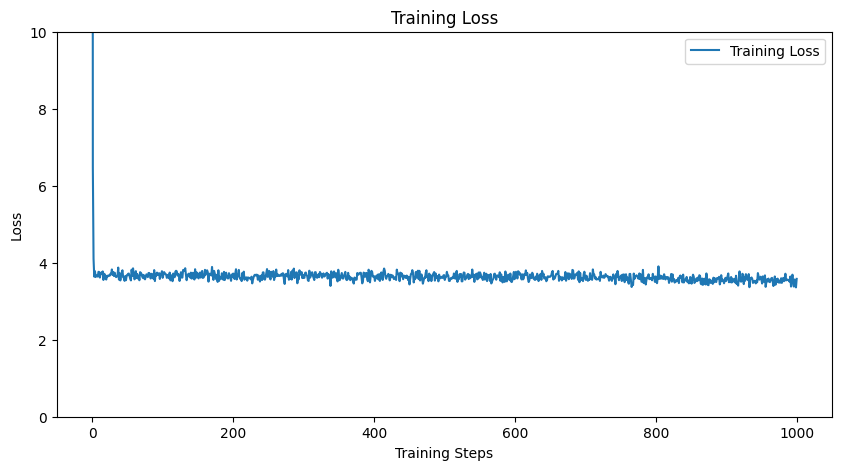

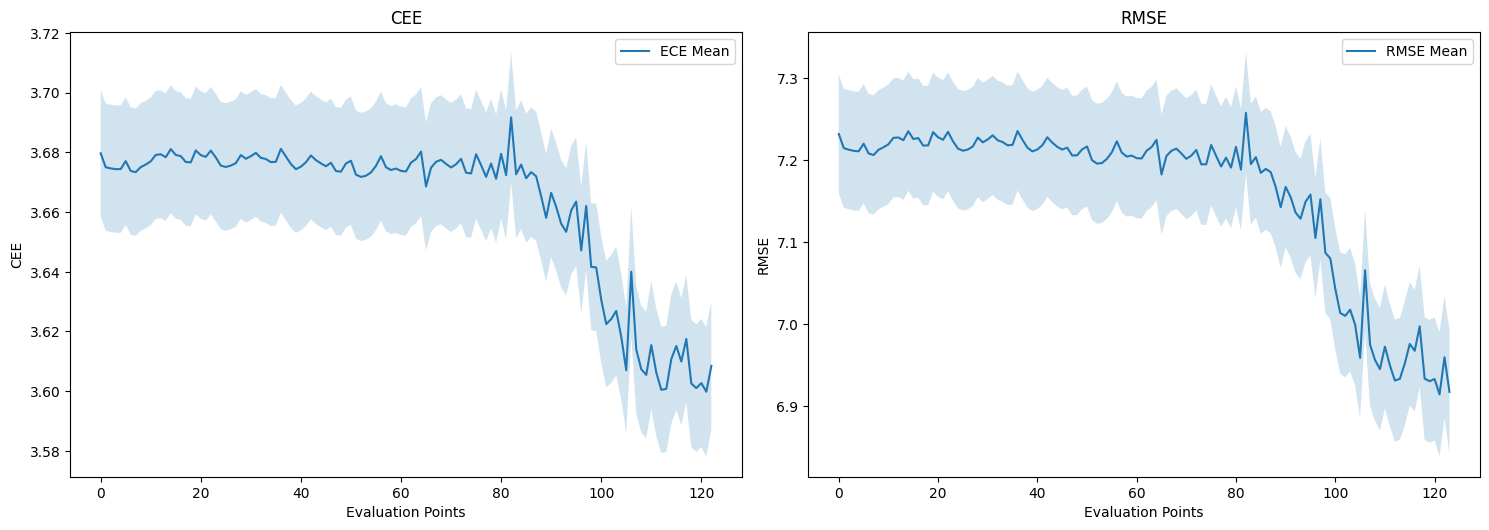

Minimum RMSE:  6.914331
Minimum ECE:  3.5997784


In [44]:
import pickle
import os
import matplotlib.pyplot as plt

# Define the path where the data is saved
save_path = "./baseline_deneme10/"
model_name = "base_0_1_"

# Load the saved metrics
with open(os.path.join(save_path, model_name + '_training_metrics.pkl'), 'rb') as f:
    metrics = pickle.load(f)

# Extract the data
losses = metrics["training_loss"]
in_task_errors = metrics["training_intask_errors"]
out_task_errors = metrics["training_outtask_errors"]

# Plot the losses
plot_losses(losses)

# Plot the in-task errors
plot_in_task_errors(in_task_errors)